<a href="https://colab.research.google.com/github/puttipongyy/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

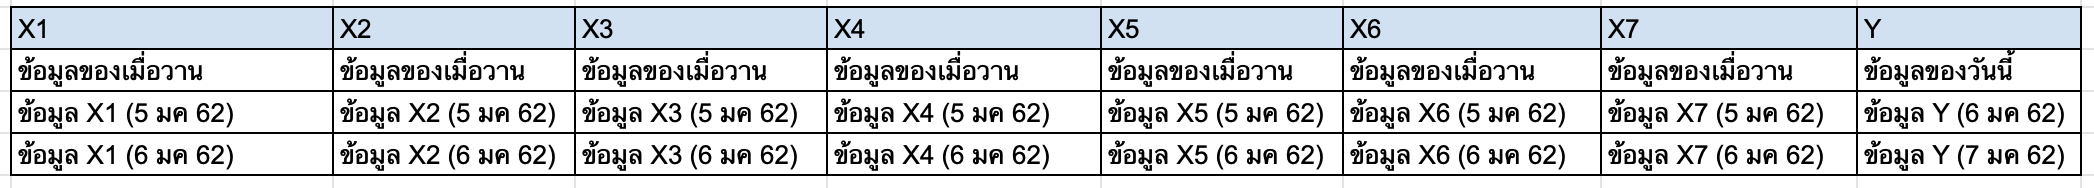

In [646]:
import pandas as pd

In [647]:
import numpy as np

In [648]:
#mount colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ข้อมูลสถานี
- 381201-ขอนแก่น จ.ขอนแก่น
- 357201-นครพนม จ.นครพนม
- 356201-สกลนคร จ.สกลนคร
- 352201-หนองคาย จ.หนองคาย
- 353201-เลย จ.เลย

# อ่านไฟล์ excel

In [649]:
column_re = ['No.', 'station', 'date', 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31, "average"] # column rename list

## ความกดอากาศ ap

In [650]:
ap_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [651]:
ap_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [652]:
ap_npm = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4, names= column_re)
ap_npm.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [653]:
ap_snk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4, names= column_re)

In [654]:
ap_snk.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


In [655]:
ap_nki = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4, names= column_re)

In [656]:
ap_nki.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [657]:
ap_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4, names= column_re)

In [658]:
ap_lei.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


## ความชื้นสัมพัทธ์ humid

In [659]:
humid_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [660]:
humid_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [661]:
humid_npm = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header =4, names = column_re)

In [662]:
humid_snk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header =4, names = column_re)

In [663]:
humid_nki = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header =4, names = column_re)

In [664]:
humid_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header =4, names = column_re)

In [665]:
humid_npm.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


## ความเร็วลม ws

In [666]:
ws_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [667]:
ws_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [668]:
ws_npm = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header =4, names = column_re)

In [669]:
ws_snk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header =4, names = column_re)

In [670]:
ws_nki = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header =4, names = column_re)

In [671]:
ws_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header =4, names = column_re)

## จำนวนเมฆ cc

In [672]:
cc_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [673]:
cc_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


In [674]:
cc_npm = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header =4, names = column_re)

In [675]:
cc_snk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header =4, names = column_re)

In [676]:
cc_nki = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header =4, names = column_re)

In [677]:
cc_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header =4)

In [678]:
cc_lei = cc_lei.iloc[:, :35]
cc_lei.columns = column_re
cc_lei

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,4,4,6,7,6,...,2,2,2,2,2,2,1,3,6,3.000000
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,7,4,4,2,...,3,6,3,4,6,6,8,6,-,3.800000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,6,6,3,6,4,...,6,2,6,8,4,2,1,4,2,3.032258
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,1,2,4,1,...,1,2,4,3,8,10,7,5,9,3.333333
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6,8,6,3,1,2,0,...,4,0,1,2,2,3,8,6,3,3.000000


## ปริมาณฝน rf

In [679]:
rf_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [680]:
rf_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [681]:
rf_npm = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header =4, names = column_re)

In [682]:
rf_snk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header =4, names = column_re)

In [683]:
rf_nki = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header =4, names = column_re)

In [684]:
rf_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header =4, names = column_re)

## อุณหภูมิจุดน้ำค้าง dp

In [685]:
dp_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [686]:
dp_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [687]:
dp_npm = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header =4, names = column_re)

In [688]:
dp_snk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header =4, names = column_re)

In [689]:
dp_nki = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header =4, names = column_re)

In [690]:
dp_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header =4, names = column_re)

## อุณหภูมิตุ้มแห้ง dry bulb , db

In [691]:
db_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [692]:
db_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [693]:
db_npm = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header =4, names = column_re)

In [694]:
db_snk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header =4, names = column_re)

In [695]:
db_nki = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header =4, names = column_re)

In [696]:
db_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header =4, names = column_re)

## อุณหภูมิต่ำสุด lt

In [697]:
lt_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [698]:
lt_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [699]:
lt_npm = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [700]:
lt_snk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [701]:
lt_nki = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

In [702]:
lt_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header =4, names = column_re)

# Preprocessing

In [703]:
def feb_28(df):
  f_28 = df[(df['date'].dt.month == 2) & ((df['date'].dt.year)%4 != 0)]
  df.loc[f_28.index , [29,30,31]] = 'nope'

def feb_29(df):
  f_29 = df[(df['date'].dt.month == 2) & ((df['date'].dt.year)%4 == 0)]
  df.loc[f_29.index , [30,31]] = 'nope'

def november(df):
  nov = df[(df['date'].dt.month == 11)]
  df.loc[nov.index , 31] = 'nope'

def rule_month_days(df):
  feb_28(df)
  feb_29(df)
  november(df)

def nope_nan(df):
  df.replace('nope', np.nan, inplace = True)


def na_avg(df):
  df = df.apply(lambda row: row.fillna(row['average']), axis=1)

## ตรวจสอบความถูกต้องของข้อมูล และแก้ไขค่า MISSING

### ความกดอากาศ ap
นำค่าเฉลี่ยของแต่ละเดือนแทนลงในค่า missing

In [704]:
ap_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [705]:
ap_kkn.isnull().any()

No.        False
station    False
date       False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
30         False
31         False
average    False
dtype: bool

In [706]:
ap_kkn[ap_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [707]:
rule_month_days(ap_kkn)

In [708]:
ap_kkn.replace('-', np.nan, inplace = True)

In [709]:
ap_kkn[ap_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [710]:
ap_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,nope,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,nope,nope,1009.749667


In [711]:
nope_nan(ap_kkn)

In [712]:
ap_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,NaN,NaN,1009.749667


In [713]:
ap_kkn[ap_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,NaN,NaN,1009.749667
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,NaN,1010.464333
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,NaN,NaN,NaN,1011.207500
11,9,352201-หนองคาย จ.หนองคาย,2013-11-01,1011.98,1011.46,1012.38,1014.27,1013.73,1012.49,1012.23,...,1010.88,1010.65,1009.57,1009.86,1011.42,1014.45,1016.41,1015.26,NaN,1011.742333
14,12,352201-หนองคาย จ.หนองคาย,2014-02-01,1011.69,1008.58,1006.13,1005.61,1006.28,1006.33,1006.42,...,1013.56,1013.11,1012.19,1010.95,1011.90,1010.65,NaN,NaN,NaN,1011.170667
16,14,352201-หนองคาย จ.หนองคาย,2014-11-01,1009.82,1010.80,1012.60,1012.98,1013.05,1011.94,1011.51,...,1012.04,1011.58,1010.59,1009.18,1009.71,1009.71,1009.31,1008.11,NaN,1012.142333
19,17,352201-หนองคาย จ.หนองคาย,2015-02-01,1017.24,1017.93,1018.05,1016.92,1016.98,1017.54,1015.70,...,1012.47,1010.20,1008.99,1008.88,1009.33,1009.39,NaN,NaN,NaN,1013.369286
21,19,352201-หนองคาย จ.หนองคาย,2015-11-01,1014.97,1015.22,1014.31,1012.89,1010.98,1010.44,1012.16,...,1011.81,1011.37,1011.94,1013.02,1014.29,1015.72,1015.50,1014.26,NaN,1012.320333
24,22,352201-หนองคาย จ.หนองคาย,2016-02-01,1012.54,1015.56,1015.71,1014.56,1014.67,1018.76,1021.78,...,1013.14,1016.51,1020.20,1020.62,1019.59,1018.81,1018.79,NaN,NaN,1015.699000


In [714]:
ap_kkn['station'] = 'KKN'

In [715]:
ap_kkn.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,KKN,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645
1,2,KKN,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000
2,3,KKN,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000
3,1,KKN,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,KKN,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,NaN,NaN,1009.749667


In [716]:
cl_ap_kkn = ap_kkn.copy()

In [717]:
rule_month_days(ap_npm)

In [718]:
ap_npm.replace('-', np.nan, inplace = True)

In [719]:
ap_npm[ap_npm.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [720]:
nope_nan(ap_npm)

In [721]:
cl_ap_npm = ap_npm.copy()

In [722]:
rule_month_days(ap_snk)

In [723]:
ap_snk.replace('-', np.nan, inplace = True)

In [724]:
ap_snk[ap_snk.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [725]:
nope_nan(ap_snk)

In [726]:
cl_ap_snk = ap_snk.copy()

In [727]:
rule_month_days(ap_nki)

In [728]:
ap_nki.replace('-', np.nan, inplace = True)

In [729]:
ap_nki[ap_nki.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [730]:
nope_nan(ap_nki)

In [731]:
cl_ap_nki = ap_nki.copy()

In [732]:
rule_month_days(ap_lei)

In [733]:
ap_lei.replace('-', np.nan, inplace = True)

In [734]:
ap_lei[ap_lei.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [735]:
nope_nan(ap_lei)

In [736]:
cl_ap_lei = ap_lei.copy()

### ความชื้นสัมพัทธ์ humid
นำค่าเฉลี่ยมาแทนค่า missing

In [737]:
rule_month_days(humid_kkn)

In [738]:
humid_kkn.replace('-', np.nan, inplace = True)

In [739]:
humid_kkn[humid_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [740]:
humid_kkn = humid_kkn.apply(lambda row: row.fillna(row['average']), axis=1)

In [741]:
nope_nan(humid_kkn)

In [742]:
cl_humid_kkn = humid_kkn.copy()

In [743]:
rule_month_days(humid_npm)

In [744]:
humid_npm.replace('-', np.nan, inplace = True)

In [745]:
humid_npm[humid_npm.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [746]:
humid_npm= humid_npm.apply(lambda row: row.fillna(row['average']), axis=1)

In [747]:
nope_nan(humid_npm)

In [748]:
cl_humid_npm = humid_npm.copy()

In [749]:
rule_month_days(humid_snk)

In [750]:
humid_snk.replace('-', np.nan, inplace = True)

In [751]:
humid_snk[humid_snk.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [752]:
nope_nan(humid_snk)

In [753]:
cl_humid_snk = humid_snk.copy()

In [754]:
rule_month_days(humid_nki)

In [755]:
humid_nki.replace('-', np.nan, inplace = True)

In [756]:
humid_nki[humid_nki.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [757]:
humid_nki= humid_nki.apply(lambda row: row.fillna(row['average']), axis=1)

In [758]:
nope_nan(humid_nki)

In [759]:
cl_humid_nki = humid_nki.copy()

In [760]:
rule_month_days(humid_lei)

In [761]:
humid_lei.replace('-', np.nan, inplace = True)

In [762]:
humid_lei[humid_lei.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [763]:
humid_lei= humid_lei.apply(lambda row: row.fillna(row['average']), axis=1)

In [764]:
nope_nan(humid_lei)

In [765]:
cl_humid_lei = humid_lei.copy()

### ความเร็วลม
แทนค่า missing '-' ด้วย 0

In [766]:
rule_month_days(ws_kkn)

In [767]:
ws_kkn.replace('-', np.nan, inplace = True)

In [768]:
ws_kkn[ws_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
35,33,353301-เลย สกษ. จ.เลย,2018-10-01,3,1,3.0,3,3,2,0,...,1,1,0,2,4,4,3,3,3,1.900000
37,35,353301-เลย สกษ. จ.เลย,2018-12-01,1,0,NaN,1,2,1,2,...,3,4,2,2,4,5,5,5,4,2.633333


In [769]:
ws_kkn.fillna(0, inplace = True)

In [770]:
nope_nan(ws_kkn)

In [771]:
cl_ws_kkn = ws_kkn.copy()

In [772]:
rule_month_days(ws_npm)

In [773]:
ws_npm.replace('-', np.nan, inplace = True)

In [774]:
ws_npm[ws_npm.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,2.0,3,3.0,...,4,1.0,5.0,1,1,1.0,4,5,4,2.448276
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,2.0,2.0,2,0.0,...,2,1.0,1.0,1,3,1.0,2,1,nope,1.571429
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2.0,1.0,2,2.0,...,2,0.0,3.0,2,3,0.0,1,1,2,1.900000
10,8,353301-เลย สกษ. จ.เลย,2013-10-01,1,2,1,2.0,2.0,1,1.0,...,2,2.0,1.0,1,2,1.0,NaN,1,3,1.700000
13,11,353301-เลย สกษ. จ.เลย,2014-01-01,0,1,0,3.0,NaN,0,1.0,...,3,1.0,2.0,3,4,1.0,3,2,1,2.400000
15,13,353301-เลย สกษ. จ.เลย,2014-10-01,1,1,1,1.0,2.0,3,3.0,...,2,1.0,1.0,1,2,2.0,1,1,2,1.600000
16,14,353301-เลย สกษ. จ.เลย,2014-11-01,1,1,3,2.0,1.0,1,1.0,...,1,NaN,NaN,0,1,NaN,1,2,nope,1.666667
28,26,353301-เลย สกษ. จ.เลย,2017-01-01,0,1,2,3.0,2.0,2,2.0,...,3,1.0,2.0,3,4,1.0,0,3,2,1.966667
29,27,353301-เลย สกษ. จ.เลย,2017-02-01,2,1,2,2.0,2.0,1,1.0,...,2,4.0,4.0,5,5,3.0,nope,nope,nope,2.689655
30,28,353301-เลย สกษ. จ.เลย,2017-10-01,1,1,3,1.0,2.0,1,NaN,...,4,NaN,1.0,1,1,2.0,2,3,2,1.346154


In [775]:
ws_npm.fillna(0, inplace = True)

In [776]:
nope_nan(ws_npm)

In [777]:
cl_ws_npm = ws_npm.copy()

In [778]:
rule_month_days(ws_snk)

In [779]:
ws_snk.replace('-', np.nan, inplace = True)

In [780]:
ws_snk[ws_snk.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2.0,1,2,2,...,2,0,3,2,3,0,1,1,2,1.900000
10,8,353301-เลย สกษ. จ.เลย,2013-10-01,1,2,1,2.0,2,1,1,...,2,2,1,1,2,1,NaN,1,3,1.700000
51,49,353301-เลย สกษ. จ.เลย,2021-11-01,1,2,2,NaN,1,1,1,...,4,3,2,2,3,3,2,4,nope,2.310345


In [781]:
ws_snk.fillna(0, inplace = True)

In [782]:
nope_nan(ws_snk)

In [783]:
cl_ws_snk = ws_snk.copy()

In [784]:
rule_month_days(ws_nki)

In [785]:
ws_nki.replace('-', np.nan, inplace = True)

In [786]:
ws_nki[ws_nki.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
51,49,353301-เลย สกษ. จ.เลย,2021-11-01,1,2,2,NaN,1,1,1,...,4,3,2,2,3,3,2,4,nope,2.310345


In [787]:
ws_nki.fillna(0, inplace = True)

In [788]:
nope_nan(ws_nki)

In [789]:
cl_ws_nki = ws_nki.copy()

In [790]:
rule_month_days(ws_lei)

In [791]:
ws_lei.replace('-', np.nan, inplace = True)

In [792]:
ws_lei[ws_lei.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
43,41,353301-เลย สกษ. จ.เลย,2020-01-01,1,2,2,1,1.0,1,2,...,1,NaN,2,2,2,2,2,2,2,1.500000
45,43,353301-เลย สกษ. จ.เลย,2020-10-01,1,1,2,1,1.0,1,1,...,1,1.0,1,1,1,2,2,2,1,1.300000
48,46,353301-เลย สกษ. จ.เลย,2021-01-01,2,1,1,1,1.0,0,1,...,2,1.0,1,2,1,1,2,1,2,1.633333
53,1,353301-เลย สกษ. จ.เลย,2022-01-01,2,1,1,1,NaN,1,1,...,1,1.0,1,1,1,1,2,2,1,1.166667


In [793]:
ws_lei.fillna(0, inplace = True)

In [794]:
nope_nan(ws_lei)

In [795]:
cl_ws_lei = ws_lei.copy()

### จำนวนเมฆ CC
แทนค้า missing '-' ด้วยค่า 0

In [796]:
rule_month_days(cc_kkn)

In [797]:
cc_kkn.replace('-', np.nan, inplace = True)

In [798]:
cc_kkn[cc_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
35,33,353301-เลย สกษ. จ.เลย,2018-10-01,3,1,3.0,3,3,2,0,...,1,1,0,2,4,4,3,3,3,1.900000
37,35,353301-เลย สกษ. จ.เลย,2018-12-01,1,0,NaN,1,2,1,2,...,3,4,2,2,4,5,5,5,4,2.633333


In [799]:
cc_kkn.fillna(0, inplace = True)

In [800]:
nope_nan(cc_kkn)

In [801]:
cl_cc_kkn = cc_kkn.copy()

In [802]:
rule_month_days(cc_npm)

In [803]:
cc_npm.replace('-', np.nan, inplace = True)

In [804]:
cc_npm[cc_npm.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
13,11,353301-เลย สกษ. จ.เลย,2014-01-01,0.0,NaN,NaN,0.0,NaN,NaN,1.0,...,1.0,NaN,1.0,1,1.0,1,1,2,1,1.400000
14,12,353301-เลย สกษ. จ.เลย,2014-02-01,0.0,NaN,1.0,2.0,5.0,4.0,3.0,...,2.0,2.0,2.0,3,3.0,4,nope,nope,nope,3.517241
18,16,353301-เลย สกษ. จ.เลย,2015-01-01,1.0,1.0,4.0,2.0,2.0,2.0,7.0,...,NaN,1.0,1.0,0,1.0,0,1,1,3,2.766667
24,22,353301-เลย สกษ. จ.เลย,2016-02-01,3.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,0,2.0,2,2,nope,nope,1.481481
26,24,353301-เลย สกษ. จ.เลย,2016-11-01,7.0,3.0,3.0,1.0,5.0,4.0,7.0,...,7.0,5.0,5.0,2,NaN,0,0,0,nope,3.103448
29,27,353301-เลย สกษ. จ.เลย,2017-02-01,2.0,6.0,6.0,3.0,1.0,0.0,NaN,...,2.0,5.0,8.0,6,2.0,2,nope,nope,nope,2.333333
32,30,353301-เลย สกษ. จ.เลย,2017-12-01,5.0,4.0,2.0,1.0,3.0,3.0,2.0,...,1.0,2.0,5.0,10,9.0,6,3,5,3,3.733333
34,32,353301-เลย สกษ. จ.เลย,2018-02-01,6.0,6.0,3.0,5.0,4.0,2.0,2.0,...,7.0,4.0,1.0,2,4.0,2,nope,nope,nope,3.275862
36,34,353301-เลย สกษ. จ.เลย,2018-11-01,NaN,NaN,NaN,NaN,1.0,2.0,5.0,...,6.0,6.0,5.0,2,10.0,7,6,2,nope,4.384615
37,35,353301-เลย สกษ. จ.เลย,2018-12-01,2.0,1.0,2.0,3.0,1.0,1.0,5.0,...,4.0,3.0,2.0,1,2.0,7,9,4,4,3.266667


In [805]:
cc_npm.fillna(0, inplace = True)

In [806]:
nope_nan(cc_npm)

In [807]:
cl_cc_npm = cc_npm.copy()

In [808]:
rule_month_days(cc_snk)

In [809]:
cc_snk.replace('-', np.nan, inplace = True)

In [810]:
cc_snk[cc_snk.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,1.0,2.0,2.0,2.0,6.0,6.0,...,3.0,2.0,NaN,0.0,0.0,0.0,0,1,NaN,2.703704
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4.0,4.0,8.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,1.0,6.0,4.0,0,nope,nope,2.142857
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3.0,3.0,5.0,5.0,2.0,2.0,3.0,...,3.0,1.0,6.0,7.0,3.0,1.0,0,1,4,2.137931
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2.0,1.0,1.0,5.0,0.0,2.0,2.0,...,NaN,1.0,2.0,5.0,6.0,9.0,2,6,9,2.928571
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2.0,6.0,8.0,5.0,1.0,0.0,0.0,...,3.0,1.0,2.0,2.0,1.0,1.0,nope,nope,nope,2.074074
10,8,353301-เลย สกษ. จ.เลย,2013-10-01,6.0,8.0,4.0,1.0,0.0,0.0,1.0,...,4.0,6.0,5.0,2.0,NaN,1.0,NaN,1,0,3.678571
12,10,353301-เลย สกษ. จ.เลย,2013-12-01,3.0,1.0,3.0,2.0,3.0,2.0,0.0,...,0.0,2.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2.500000
13,11,353301-เลย สกษ. จ.เลย,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1,2,0,1.055556
14,12,353301-เลย สกษ. จ.เลย,2014-02-01,NaN,NaN,0.0,2.0,2.0,2.0,1.0,...,1.0,1.0,2.0,4.0,3.0,2.0,nope,nope,nope,2.392857
15,13,353301-เลย สกษ. จ.เลย,2014-10-01,2.0,2.0,0.0,1.0,3.0,8.0,4.0,...,4.0,6.0,5.0,3.0,4.0,4.0,3,1,1,3.000000


In [811]:
cc_snk.fillna(0, inplace = True)

In [812]:
nope_nan(cc_snk)

In [813]:
cl_cc_snk = cc_snk.copy()

In [814]:
rule_month_days(cc_nki)

In [815]:
cc_nki.replace('-', np.nan, inplace = True)

In [816]:
cc_nki[cc_nki.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1.0,0.0,0.0,1.0,1.0,2.0,6.0,...,6.0,6.0,NaN,0.0,1.0,2.0,4,2,nope,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4.0,4.0,NaN,2.0,7.0,5.0,5.0,...,2.0,8.0,1.0,NaN,3.0,1.0,1,3,NaN,3.285714
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7.0,8.0,10.0,6.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,5.0,6,nope,nope,4.928571
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4.0,2.0,0.0,1.0,1.0,3.0,1.0,...,1.0,4.0,3.0,7.0,10.0,10.0,5,4,10,3.448276
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4.0,8.0,8.0,5.0,0.0,0.0,0.0,...,1.0,1.0,2.0,3.0,1.0,1.0,nope,nope,nope,2.375000
10,8,353301-เลย สกษ. จ.เลย,2013-10-01,9.0,8.0,6.0,1.0,0.0,2.0,1.0,...,1.0,6.0,8.0,3.0,0.0,4.0,2,1,1,4.500000
11,9,353301-เลย สกษ. จ.เลย,2013-11-01,3.0,5.0,2.0,0.0,NaN,3.0,7.0,...,2.0,2.0,5.0,5.0,2.0,5.0,6,5,nope,4.862069
12,10,353301-เลย สกษ. จ.เลย,2013-12-01,5.0,1.0,1.0,2.0,1.0,2.0,NaN,...,0.0,1.0,3.0,0.0,NaN,NaN,0,NaN,0,2.480000
13,11,353301-เลย สกษ. จ.เลย,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0,1,NaN,1.000000
14,12,353301-เลย สกษ. จ.เลย,2014-02-01,NaN,NaN,0.0,NaN,NaN,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,4.0,nope,nope,nope,3.120000


In [817]:
cc_nki.fillna(0, inplace = True)

In [818]:
nope_nan(cc_nki)

In [819]:
cl_cc_nki = cc_nki.copy()

In [820]:
rule_month_days(cc_lei)

In [821]:
cc_lei.replace('-', np.nan, inplace = True)

In [822]:
cc_lei[cc_lei.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,0.0,1.0,3.0,NaN,nope,nope,2.809524
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2.0,2.0,2.0,1.0,2.0,4.0,1.0,...,1.0,2.0,4.0,3.0,8.0,10.0,7,5,9,3.333333
12,10,353301-เลย สกษ. จ.เลย,2013-12-01,5.0,3.0,2.0,2.0,2.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0,0,0,1.933333
13,11,353301-เลย สกษ. จ.เลย,2014-01-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,1,NaN,0.875000
14,12,353301-เลย สกษ. จ.เลย,2014-02-01,NaN,NaN,NaN,0.0,1.0,0.0,1.0,...,2.0,4.0,2.0,1.0,2.0,2.0,nope,nope,nope,2.481481
17,15,353301-เลย สกษ. จ.เลย,2014-12-01,3.0,8.0,7.0,6.0,6.0,3.0,2.0,...,2.0,2.0,4.0,3.0,4.0,2.0,1,NaN,0,3.166667
18,16,353301-เลย สกษ. จ.เลย,2015-01-01,0.0,NaN,0.0,NaN,0.0,0.0,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2.857143
24,22,353301-เลย สกษ. จ.เลย,2016-02-01,1.0,4.0,NaN,1.0,1.0,6.0,2.0,...,1.0,6.0,3.0,2.0,1.0,3.0,1,nope,nope,1.615385
27,25,353301-เลย สกษ. จ.เลย,2016-12-01,1.0,1.0,2.0,6.0,5.0,9.0,3.0,...,2.0,2.0,1.0,1.0,2.0,1.0,1,1,5,2.900000
29,27,353301-เลย สกษ. จ.เลย,2017-02-01,1.0,5.0,3.0,1.0,NaN,0.0,NaN,...,NaN,1.0,8.0,10.0,6.0,3.0,nope,nope,nope,2.166667


In [823]:
cc_lei.fillna(0, inplace = True)

In [824]:
nope_nan(cc_lei)

In [825]:
cl_cc_lei = cc_lei.copy()

### ปริมาณน้ำฝน rf
แทนค่า missing '-' ด้วย 0
และค่า T ด้วย 0.05

In [826]:
rule_month_days(rf_kkn)

In [827]:
rf_kkn.replace('-', np.nan, inplace = True)

In [828]:
rf_kkn.replace('T', 0.05, inplace = True)

In [829]:
rf_kkn[rf_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0,0,0,NaN
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0,0,0,NaN
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,nope,nope,nope,NaN
10,8,381201-ขอนแก่น จ.ขอนแก่น,2013-10-01,0.20,7.5,NaN,NaN,NaN,NaN,NaN,...,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.50
11,9,381201-ขอนแก่น จ.ขอนแก่น,2013-11-01,NaN,NaN,NaN,NaN,NaN,0.05,0.60,...,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,nope,1.40
12,10,381201-ขอนแก่น จ.ขอนแก่น,2013-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.10
13,11,381201-ขอนแก่น จ.ขอนแก่น,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.00,NaN,0,0,NaN,NaN
14,12,381201-ขอนแก่น จ.ขอนแก่น,2014-02-01,NaN,NaN,NaN,0.00,0.00,0.00,NaN,...,NaN,0.00,NaN,0.0,0.00,NaN,nope,nope,nope,NaN
15,13,381201-ขอนแก่น จ.ขอนแก่น,2014-10-01,NaN,NaN,NaN,NaN,1.00,0.05,NaN,...,17.20,0.20,NaN,NaN,NaN,NaN,NaN,NaN,0.2,19.30
16,14,381201-ขอนแก่น จ.ขอนแก่น,2014-11-01,NaN,NaN,NaN,NaN,NaN,0.05,6.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nope,6.90


In [830]:
rf_kkn.fillna(0, inplace = True)

In [831]:
nope_nan(rf_kkn)

In [832]:
cl_rf_kkn = rf_kkn.copy()

In [833]:
rule_month_days(rf_npm)

In [834]:
rf_npm.replace('-', np.nan, inplace = True)

In [835]:
rf_npm.replace('T', 0.05, inplace = True)

In [836]:
rf_npm[rf_npm.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0,0,0,NaN
7,5,357201-นครพนม จ.นครพนม,2012-12-01,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0,0,0,NaN
10,8,357201-นครพนม จ.นครพนม,2013-10-01,2.2,0.8,NaN,NaN,NaN,NaN,NaN,...,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00
11,9,357201-นครพนม จ.นครพนม,2013-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nope,0.30
12,10,357201-นครพนม จ.นครพนม,2013-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.50
13,11,357201-นครพนม จ.นครพนม,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,0.00,0.0,0.00,0,NaN,0,NaN
14,12,357201-นครพนม จ.นครพนม,2014-02-01,NaN,0.0,0.0,0.0,0.05,NaN,0.0,...,0.00,0.00,0.00,0.00,0.0,NaN,nope,nope,nope,0.05
15,13,357201-นครพนม จ.นครพนม,2014-10-01,NaN,0.0,0.0,1.0,1.80,0.05,0.0,...,0.00,8.70,0.00,2.10,NaN,9.30,0,0,0,23.00
16,14,357201-นครพนม จ.นครพนม,2014-11-01,0.0,0.0,0.0,NaN,0.00,0.00,0.6,...,0.00,0.00,0.00,0.00,0.0,0.00,0,0,nope,0.60
17,15,357201-นครพนม จ.นครพนม,2014-12-01,0.1,0.0,NaN,NaN,NaN,NaN,0.0,...,0.00,NaN,0.00,0.00,0.0,NaN,NaN,NaN,NaN,0.10


In [837]:
rf_npm.fillna(0, inplace = True)

In [838]:
nope_nan(rf_npm)

In [839]:
cl_rf_npm = rf_npm.copy()

In [840]:
rule_month_days(rf_snk)

In [841]:
rf_snk.replace('-', np.nan, inplace = True)

In [842]:
rf_snk.replace('T', 0.05, inplace = True)

In [843]:
rf_snk[rf_snk.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,NaN
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,NaN
10,8,356201-สกลนคร จ.สกลนคร,2013-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.90
11,9,356201-สกลนคร จ.สกลนคร,2013-11-01,NaN,NaN,NaN,NaN,NaN,NaN,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nope,0.40
12,10,356201-สกลนคร จ.สกลนคร,2013-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.70
13,11,356201-สกลนคร จ.สกลนคร,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
14,12,356201-สกลนคร จ.สกลนคร,2014-02-01,0.0,NaN,NaN,NaN,0.0,0.0,NaN,...,0.0,NaN,0.0,NaN,0.00,0.00,nope,nope,nope,NaN
15,13,356201-สกลนคร จ.สกลนคร,2014-10-01,NaN,NaN,NaN,0.5,1.8,NaN,NaN,...,NaN,5.2,NaN,NaN,42.10,0.80,NaN,NaN,NaN,50.60
16,14,356201-สกลนคร จ.สกลนคร,2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nope,14.10
17,15,356201-สกลนคร จ.สกลนคร,2014-12-01,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20


In [844]:
rf_snk.fillna(0, inplace = True)

In [845]:
nope_nan(rf_snk)

In [846]:
cl_rf_snk = rf_snk.copy()

In [847]:
rule_month_days(rf_nki)

In [848]:
rf_nki.replace('-', np.nan, inplace = True)

In [849]:
rf_nki.replace('T', 0.05, inplace = True)

In [850]:
rf_nki[rf_nki.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
10,8,352201-หนองคาย จ.หนองคาย,2013-10-01,0.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,61.9
11,9,352201-หนองคาย จ.หนองคาย,2013-11-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nope,NaN
12,10,352201-หนองคาย จ.หนองคาย,2013-12-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.5
13,11,352201-หนองคาย จ.หนองคาย,2014-01-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,12,352201-หนองคาย จ.หนองคาย,2014-02-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,nope,nope,nope,NaN
15,13,352201-หนองคาย จ.หนองคาย,2014-10-01,3.1,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,6.1,NaN,NaN,NaN,15.0
16,14,352201-หนองคาย จ.หนองคาย,2014-11-01,NaN,NaN,NaN,NaN,NaN,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nope,6.0
17,15,352201-หนองคาย จ.หนองคาย,2014-12-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,16,352201-หนองคาย จ.หนองคาย,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.4


In [851]:
rf_nki.fillna(0, inplace = True)

In [852]:
nope_nan(rf_nki)

In [853]:
cl_rf_nki = rf_nki.copy()

In [854]:
rule_month_days(rf_lei)

In [855]:
rf_lei.replace('-', np.nan, inplace = True)

In [856]:
rf_lei.replace('T', 0.05, inplace = True)

In [857]:
rf_lei[rf_lei.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
13,11,353201-เลย จ.เลย,2014-01-01,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,NaN
15,13,353201-เลย จ.เลย,2014-10-01,12.60,4.6,NaN,NaN,NaN,0.2,NaN,...,112.4,34.80,NaN,NaN,0.0,0.2,22.4,3.6,0,193.00
16,14,353201-เลย จ.เลย,2014-11-01,NaN,NaN,NaN,NaN,9.40,0.4,23.8,...,NaN,0.00,NaN,NaN,0.0,0.0,1,NaN,nope,36.20
17,15,353201-เลย จ.เลย,2014-12-01,0.05,0.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0.05
18,16,353201-เลย จ.เลย,2015-01-01,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0,0,12.00
19,17,353201-เลย จ.เลย,2015-02-01,0.00,0.0,NaN,NaN,0.00,NaN,NaN,...,NaN,0.00,0.0,NaN,NaN,0.0,nope,nope,nope,44.60
20,18,353201-เลย จ.เลย,2015-10-01,1.50,2.0,21.6,NaN,NaN,1.8,17.8,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,69.70
21,19,353201-เลย จ.เลย,2015-11-01,0.40,NaN,0.0,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,nope,23.00
22,20,353201-เลย จ.เลย,2015-12-01,NaN,NaN,0.0,5.4,10.40,NaN,0.0,...,0.0,NaN,1.2,NaN,1.2,0.0,NaN,0,NaN,18.20
23,21,353201-เลย จ.เลย,2016-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,0.05,7.5,7.0,2.6,0.8,NaN,NaN,NaN,34.10


In [858]:
rf_lei.fillna(0, inplace = True)

In [859]:
nope_nan(rf_lei)

In [860]:
cl_rf_lei = rf_lei.copy()

### อุณหภูมิจุดน้ำค้าง dp
แทนที่ค่า missing ด้วยค่าเฉลี่ยของเดือนนั้น

In [861]:
rule_month_days(dp_kkn)

In [862]:
dp_kkn.replace('-', np.nan, inplace = True)

In [863]:
dp_kkn[dp_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [864]:
dp_kkn = dp_kkn.apply(lambda row: row.fillna(row['average']), axis=1)

In [865]:
nope_nan(dp_kkn)

In [866]:
cl_dp_kkn = dp_kkn.copy()

In [867]:
rule_month_days(dp_npm)

In [868]:
dp_npm.replace('-', np.nan, inplace = True)

In [869]:
dp_npm[dp_npm.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [870]:
dp_npm = dp_npm.apply(lambda row: row.fillna(row['average']), axis=1)

In [871]:
nope_nan(dp_npm)

In [872]:
cl_dp_npm = dp_npm.copy()

In [873]:
rule_month_days(dp_snk)

In [874]:
dp_snk.replace('-', np.nan, inplace = True)

In [875]:
dp_snk[dp_snk.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [876]:
dp_snk = dp_snk.apply(lambda row: row.fillna(row['average']), axis=1)

In [877]:
nope_nan(dp_snk)

In [878]:
cl_dp_snk = dp_snk.copy()

In [879]:
rule_month_days(dp_nki)

In [880]:
dp_nki.replace('-', np.nan, inplace = True)

In [881]:
dp_nki[dp_nki.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [882]:
dp_nki= dp_nki.apply(lambda row: row.fillna(row['average']), axis=1)

In [883]:
nope_nan(dp_nki)

In [884]:
cl_dp_nki = dp_nki.copy()

In [885]:
rule_month_days(dp_lei)

In [886]:
dp_lei.replace('-', np.nan, inplace = True)

In [887]:
dp_lei[dp_lei.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [888]:
dp_lei = dp_lei.apply(lambda row: row.fillna(row['average']), axis=1)

In [889]:
nope_nan(dp_lei)

In [890]:
cl_dp_lei = dp_lei.copy()

### อุณหภูมิตุ้มแห้ง db
แทนค่า missing ด้วยค่าเฉลี่ยของเดือนนั้น

In [891]:
rule_month_days(db_kkn)

In [892]:
db_kkn.replace('-', np.nan, inplace = True)

In [893]:
db_kkn[db_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [894]:
db_kkn = db_kkn.apply(lambda row: row.fillna(row['average']), axis=1)

In [895]:
nope_nan(db_kkn)

In [896]:
cl_db_kkn = db_kkn.copy()

In [897]:
rule_month_days(db_npm)

In [898]:
db_npm.replace('-', np.nan, inplace = True)

In [899]:
db_npm[db_npm.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [900]:
db_npm = db_npm.apply(lambda row: row.fillna(row['average']), axis=1)

In [901]:
nope_nan(db_npm)

In [902]:
cl_db_npm = db_npm.copy()

In [903]:
rule_month_days(db_snk)

In [904]:
db_snk.replace('-', np.nan, inplace = True)

In [905]:
db_snk[db_snk.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [906]:
db_snk = db_snk.apply(lambda row: row.fillna(row['average']), axis=1)

In [907]:
nope_nan(db_snk)

In [908]:
cl_db_snk = db_snk.copy()

In [909]:
rule_month_days(db_nki)

In [910]:
db_nki.replace('-', np.nan, inplace = True)

In [911]:
db_nki[db_nki.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [912]:
db_nki = db_nki.apply(lambda row: row.fillna(row['average']), axis=1)

In [913]:
nope_nan(db_nki)

In [914]:
cl_db_nki = db_nki.copy()

In [915]:
rule_month_days(db_lei)

In [916]:
db_lei.replace('-', np.nan, inplace = True)

In [917]:
db_lei[db_lei.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average


In [918]:
db_lei = db_lei.apply(lambda row: row.fillna(row['average']), axis=1)

In [919]:
nope_nan(db_lei)

In [920]:
cl_db_lei = db_lei.copy()

### อุณหภูมิต่ำสุด lt
แทนค่า missing '-' ด้วยค่าเฉลี่ยของเดือนนั้น

In [921]:
rule_month_days(lt_kkn)

In [922]:
lt_kkn.replace('-', np.nan, inplace = True)

In [923]:
lt_kkn[lt_kkn.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
37,35,381201-ขอนแก่น จ.ขอนแก่น,2018-12-01,22.3,22.8,22.7,22.0,21.5,22.3,22.3,...,22.5,21.0,19.3,19.4,19.1,20.2,22.1,19.2,NaN,20.8
39,37,381201-ขอนแก่น จ.ขอนแก่น,2019-02-01,22.0,19.5,21.6,22.0,23.2,23.8,21.7,...,NaN,NaN,24.8,24.5,NaN,NaN,nope,nope,nope,22.9
49,47,381201-ขอนแก่น จ.ขอนแก่น,2021-02-01,18.8,19.7,20.0,18.5,18.1,18.5,18.4,...,20.0,20.9,22.7,20.6,21.0,NaN,nope,nope,nope,19.0
51,49,381201-ขอนแก่น จ.ขอนแก่น,2021-11-01,23.8,24.0,23.4,23.4,23.5,23.8,23.8,...,20.4,19.3,19.9,19.0,18.4,18.0,18.7,NaN,nope,21.4
54,2,381201-ขอนแก่น จ.ขอนแก่น,2022-02-01,20.1,20.5,20.5,20.6,18.4,18.0,20.6,...,15.3,14.8,15.0,16.4,18.2,NaN,nope,nope,nope,20.2


In [924]:
lt_kkn = lt_kkn.apply(lambda row: row.fillna(row['average']), axis=1)

In [925]:
nope_nan(lt_kkn)

In [926]:
cl_lt_kkn = lt_kkn.copy()

In [927]:
rule_month_days(lt_npm)

In [928]:
lt_npm.replace('-', np.nan, inplace = True)

In [929]:
lt_npm[lt_npm.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
37,35,381201-ขอนแก่น จ.ขอนแก่น,2018-12-01,22.3,22.8,22.7,22.0,21.5,22.3,22.3,...,22.5,21.0,19.3,19.4,19.1,20.2,22.1,19.2,NaN,20.8
39,37,381201-ขอนแก่น จ.ขอนแก่น,2019-02-01,22.0,19.5,21.6,22.0,23.2,23.8,21.7,...,NaN,NaN,24.8,24.5,NaN,NaN,nope,nope,nope,22.9
49,47,381201-ขอนแก่น จ.ขอนแก่น,2021-02-01,18.8,19.7,20.0,18.5,18.1,18.5,18.4,...,20.0,20.9,22.7,20.6,21.0,NaN,nope,nope,nope,19.0
51,49,381201-ขอนแก่น จ.ขอนแก่น,2021-11-01,23.8,24.0,23.4,23.4,23.5,23.8,23.8,...,20.4,19.3,19.9,19.0,18.4,18.0,18.7,NaN,nope,21.4
54,2,381201-ขอนแก่น จ.ขอนแก่น,2022-02-01,20.1,20.5,20.5,20.6,18.4,18.0,20.6,...,15.3,14.8,15.0,16.4,18.2,NaN,nope,nope,nope,20.2


In [930]:
lt_npm = lt_npm.apply(lambda row: row.fillna(row['average']), axis=1)

In [931]:
nope_nan(lt_npm)

In [932]:
cl_lt_npm = lt_npm.copy()

In [933]:
rule_month_days(lt_snk)

In [934]:
lt_snk.replace('-', np.nan, inplace = True)

In [935]:
lt_snk[lt_snk.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
37,35,381201-ขอนแก่น จ.ขอนแก่น,2018-12-01,22.3,22.8,22.7,22.0,21.5,22.3,22.3,...,22.5,21.0,19.3,19.4,19.1,20.2,22.1,19.2,NaN,20.8
39,37,381201-ขอนแก่น จ.ขอนแก่น,2019-02-01,22.0,19.5,21.6,22.0,23.2,23.8,21.7,...,NaN,NaN,24.8,24.5,NaN,NaN,nope,nope,nope,22.9
49,47,381201-ขอนแก่น จ.ขอนแก่น,2021-02-01,18.8,19.7,20.0,18.5,18.1,18.5,18.4,...,20.0,20.9,22.7,20.6,21.0,NaN,nope,nope,nope,19.0
51,49,381201-ขอนแก่น จ.ขอนแก่น,2021-11-01,23.8,24.0,23.4,23.4,23.5,23.8,23.8,...,20.4,19.3,19.9,19.0,18.4,18.0,18.7,NaN,nope,21.4
54,2,381201-ขอนแก่น จ.ขอนแก่น,2022-02-01,20.1,20.5,20.5,20.6,18.4,18.0,20.6,...,15.3,14.8,15.0,16.4,18.2,NaN,nope,nope,nope,20.2


In [936]:
lt_snk = lt_snk.apply(lambda row: row.fillna(row['average']), axis=1)

In [937]:
nope_nan(lt_snk)

In [938]:
cl_lt_snk = lt_snk.copy()

In [939]:
rule_month_days(lt_nki)

In [940]:
lt_nki.replace('-', np.nan, inplace = True)

In [941]:
lt_nki[lt_nki.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
37,35,381201-ขอนแก่น จ.ขอนแก่น,2018-12-01,22.3,22.8,22.7,22.0,21.5,22.3,22.3,...,22.5,21.0,19.3,19.4,19.1,20.2,22.1,19.2,NaN,20.8
39,37,381201-ขอนแก่น จ.ขอนแก่น,2019-02-01,22.0,19.5,21.6,22.0,23.2,23.8,21.7,...,NaN,NaN,24.8,24.5,NaN,NaN,nope,nope,nope,22.9
49,47,381201-ขอนแก่น จ.ขอนแก่น,2021-02-01,18.8,19.7,20.0,18.5,18.1,18.5,18.4,...,20.0,20.9,22.7,20.6,21.0,NaN,nope,nope,nope,19.0
51,49,381201-ขอนแก่น จ.ขอนแก่น,2021-11-01,23.8,24.0,23.4,23.4,23.5,23.8,23.8,...,20.4,19.3,19.9,19.0,18.4,18.0,18.7,NaN,nope,21.4
54,2,381201-ขอนแก่น จ.ขอนแก่น,2022-02-01,20.1,20.5,20.5,20.6,18.4,18.0,20.6,...,15.3,14.8,15.0,16.4,18.2,NaN,nope,nope,nope,20.2


In [942]:
lt_nki = lt_nki.apply(lambda row: row.fillna(row['average']), axis=1)

In [943]:
nope_nan(lt_nki)

In [944]:
cl_lt_nki = lt_nki.copy()

In [945]:
rule_month_days(lt_lei)

In [946]:
lt_lei.replace('-', np.nan, inplace = True)

In [947]:
lt_lei[lt_lei.isna().any(axis=1)]

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
37,35,381201-ขอนแก่น จ.ขอนแก่น,2018-12-01,22.3,22.8,22.7,22.0,21.5,22.3,22.3,...,22.5,21.0,19.3,19.4,19.1,20.2,22.1,19.2,NaN,20.8
39,37,381201-ขอนแก่น จ.ขอนแก่น,2019-02-01,22.0,19.5,21.6,22.0,23.2,23.8,21.7,...,NaN,NaN,24.8,24.5,NaN,NaN,nope,nope,nope,22.9
49,47,381201-ขอนแก่น จ.ขอนแก่น,2021-02-01,18.8,19.7,20.0,18.5,18.1,18.5,18.4,...,20.0,20.9,22.7,20.6,21.0,NaN,nope,nope,nope,19.0
51,49,381201-ขอนแก่น จ.ขอนแก่น,2021-11-01,23.8,24.0,23.4,23.4,23.5,23.8,23.8,...,20.4,19.3,19.9,19.0,18.4,18.0,18.7,NaN,nope,21.4
54,2,381201-ขอนแก่น จ.ขอนแก่น,2022-02-01,20.1,20.5,20.5,20.6,18.4,18.0,20.6,...,15.3,14.8,15.0,16.4,18.2,NaN,nope,nope,nope,20.2


In [948]:
lt_lei = lt_lei.apply(lambda row: row.fillna(row['average']), axis=1)

In [949]:
nope_nan(lt_lei)

In [950]:
cl_lt_lei = lt_lei.copy()

In [951]:
cl_lt_lei.head()

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,NaN,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22.0,22.2,NaN,NaN,20.1


# ทำการต่อตาราง

In [973]:
cl_ap_kkn_t = cl_ap_kkn .iloc[:, 3:34]
cl_ap_kkn_t.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,1010.14,1010.60,...,1010.90,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52
1,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,1009.68,1011.96,...,1013.63,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN
2,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,1014.29,1016.10,...,1012.88,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40
3,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,1016.98,1016.18,...,1009.62,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52
4,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,1011.25,1011.42,...,1006.99,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,NaN,NaN


In [986]:
ap_kkn_melted = pd.melt(cl_ap_kkn_t, value_vars=range(1,32), var_name='Original_Column', value_name='Value')

In [987]:
ap_kkn_melted

,Original_Column,Value
0,1,1005.47
1,1,1011.79
2,1,1011.43
3,1,1015.67
4,1,1013.26
...,...,...
1700,31,1012.96
1701,31,NaN
1702,31,1018.39
1703,31,1008.91


In [971]:
cl_ap_kkn_tran =  cl_ap_kkn_t.T

In [972]:
cl_ap_kkn_tran.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
1,1005.47,1011.79,1011.43,1015.67,1013.26,1011.50,1012.67,1009.80,1014.58,1015.19,...,1005.67,1012.18,1016.17,1018.63,1014.44,1008.12,1013.23,1015.80,1017.75,1010.90
2,1006.65,1010.83,1012.57,1014.11,1012.92,1011.11,1011.17,1010.17,1013.30,1013.97,...,1006.21,1012.74,1014.73,1017.35,1014.14,1008.74,1013.04,1017.00,1016.89,1012.02
3,1007.49,1010.74,1012.28,1012.91,1013.61,1008.60,1010.47,1010.74,1013.73,1013.89,...,1007.56,1013.72,1015.23,1015.20,1014.30,1008.64,1012.50,1018.68,1015.26,1012.12
4,1008.28,1010.71,1012.97,1014.06,1013.18,1007.07,1010.24,1010.72,1012.89,1013.91,...,1008.25,1013.71,1016.08,1015.49,1015.04,1008.16,1011.41,1018.13,1014.98,1013.77
5,1009.88,1010.09,1013.09,1015.51,1011.26,1008.17,1010.43,1010.61,1011.43,1013.43,...,1008.60,1013.32,1016.58,1014.24,1014.19,1007.42,1009.71,1017.43,1013.66,1015.52


ขอนแก่น

In [ ]:
cl_ap_kkn
cl_ap_npm
cl_ap_snk
cl_ap_nki
cl_ap_lei

# test replace '-' with nan

In [81]:
humid_kkn.iloc[5:10, 2:34] = humid_kkn.iloc[5:10, 2:34].replace('-', np.nan)

In [82]:
humid_kkn.iloc[5:10, 2:34]

,date,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
5,2012-10-01,73,73,72,81,83,73,70,86,78,...,65,65,68,69,69,62,64,69.0,74.0,68.0
6,2012-11-01,64,67,67,66,65,65,67,70,72,...,64,63,75,82,75,73,73,75.0,74.0,NaN
7,2012-12-01,68,66,69,71,69,63,67,67,70,...,56,59,56,60,59,58,61,57.0,55.0,54.0
8,2013-01-01,62,58,59,60,62,61,62,63,62,...,54,59,59,59,67,71,91,78.0,71.0,72.0
9,2013-02-01,69,66,62,58,59,53,50,47,61,...,51,50,52,56,53,51,54,NaN,NaN,NaN


In [ ]:
humid_kkn

# test concat

In [63]:
ap_humid_kkn = pd.concat([ap_kkn, humid_kkn],
                  ignore_index = True)

In [69]:
ap_humid_kkn = ap_humid_kkn[:].replace('-', np.nan)

# test Replace

In [1282]:
apkn = ap_kkn.copy()

In [1285]:
apkn

,No.,station,date,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,average
0,1,KKN,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.670000,1011.300000,1011.520000,1010.350645
1,2,KKN,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.130000,1010.470000,1011.717000,1011.717000
2,3,KKN,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.980000,1015.530000,1016.400000,1016.470000
3,1,KKN,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.690000,1012.340000,1014.520000,1012.484516
4,2,KKN,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.530000,1009.749667,1009.749667,1009.749667
5,3,KKN,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.710000,1008.700000,1011.830000,1010.386452
6,4,KKN,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.040000,1009.540000,1010.464333,1010.464333
7,5,KKN,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.900000,1011.640000,1014.860000,1011.622581
8,6,KKN,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.310000,1014.990000,1015.580000,1013.629677
9,7,KKN,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,1011.207500,1011.207500,1011.207500,1011.207500


In [1284]:
apkn = apkn.apply(lambda row: row.fillna(row['average']), axis=1)